In [108]:
import ROOT
import narf
import pandas as pd
import h5py 
import hist
import hdf5plugin
import boost_histogram as bh
import numpy as np
import matplotlib.pyplot as plt

In [396]:
'''loading the file and extracting as numpy array'''
f = h5py.File("templatesTest2.hdf5","r")
results = narf.ioutils.pickle_load_h5py(f["results"])
H = results['ZmumuPostVFP']['output']['signalTemplates_nominal'].get() #boost histogram values
#H2 = resultsresults['ZmumuPostVFP']['output']['signalTemplates_mass'].get()
t = h5py.File('templatesFit.hdf5','r')

In [406]:
H.axes['Zrap'].edges

array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4])

In [405]:
H.axes['Zpt'].edges

array([ 0.        ,  3.        ,  6.        ,  9.62315204, 12.36966732,
       16.01207711, 21.35210602, 29.50001253, 60.        ])

In [307]:
qtBins = np.array([0., 3., 6., 9.62315204,12.36966732,16.01207711,21.35210602,29.50001253,60.,200.])
yBins = np.array([0., 0.4, 0.8, 1.2, 1.6, 2.0, 2.4, 3.0, 10.0])

threshold_y = np.digitize(2.4,yBins)-1
threshold_qt = np.digitize(60.,qtBins)-1

In [356]:
T = t['helicity'][:threshold_y,:threshold_qt,:] #cross sections

In [357]:
xsec = np.tile(T.ravel() ,2)

In [361]:
T[:].shape

(6, 8, 6)

In [389]:
processes = [yBinsC , qtBinsC , helicities]
multi2 = pd.MultiIndex.from_product(processes , names = ['rapidity', 'qt' , 'hel'])
charges =  [-1.0]*288 + [1.0]*288
plus_charges  = ([1.0]*288)
s = pd.Series(T.ravel(), index = multi2)

In [387]:
charges = minus_charges + plus

In [390]:
xsec_df = pd.concat([s,s] ,axis=0).reset_index()
xsec_df['charge'] = charges
xsec_df

,rapidity,qt,hel,0,charge
0,0.2,1.500000,L,1979.366479,-1.0
1,0.2,1.500000,I,223.724364,-1.0
2,0.2,1.500000,T,-349.398681,-1.0
3,0.2,1.500000,A,93.216941,-1.0
4,0.2,1.500000,P,-1292.227105,-1.0
...,...,...,...,...,...
571,2.2,44.750006,I,13912.566350,1.0
572,2.2,44.750006,T,30879.461295,1.0
573,2.2,44.750006,A,-915.293336,1.0
574,2.2,44.750006,P,-16815.741399,1.0


In [398]:
df.merge(xsec_df ,left_on=['rapidity','qt','hel','charge'], right_on=['rapidity','qt','hel','charge'])

,rapidity,qt,hel,charge,0_x,1,2,3,4,5,...,2871,2872,2873,2874,2875,2876,2877,2878,2879,0_y
0,0.2,1.500000,L,-1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1979.366479
1,0.2,1.500000,L,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1979.366479
2,0.2,1.500000,I,-1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,223.724364
3,0.2,1.500000,I,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,223.724364
4,0.2,1.500000,T,-1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-349.398681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,2.2,44.750006,A,1.0,0.000626,0.001929,0.000184,0.000000,0.003005,0.002846,...,-0.029825,-0.027480,-0.026387,-0.034075,-0.033499,-0.036300,-0.041025,-0.045092,-0.064944,-915.293336
572,2.2,44.750006,P,-1.0,0.000000,0.004627,0.000000,0.004990,0.000000,0.001050,...,0.345013,0.370216,0.373687,0.299902,0.420918,0.430292,0.405072,0.442215,0.547205,-16815.741399
573,2.2,44.750006,P,1.0,-0.001178,-0.006447,-0.014030,0.000000,-0.010808,-0.013846,...,-0.398344,-0.427367,-0.355165,-0.436638,-0.395785,-0.362856,-0.404841,-0.375148,-0.612713,-16815.741399
574,2.2,44.750006,UL,-1.0,0.000000,0.718106,0.000000,1.949844,0.000000,0.792981,...,51.065116,54.531306,60.208267,46.692098,60.506332,67.326006,58.327194,59.919824,80.896356,483870.763972


In [391]:
df.head()

,rapidity,qt,hel,charge,0,1,2,3,4,5,...,2871,2872,2873,2874,2875,2876,2877,2878,2879,xsec
helXsec_L_y_0.2_qt_1.5,0.2,1.500000,L,-1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1979.366479
helXsec_I_y_1.0_qt_14.2,1.0,14.190872,I,-1.0,-0.040436,-0.024938,-0.023825,-0.008197,-0.004066,-0.008142,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,223.724364
helXsec_L_y_1.0_qt_14.2,1.0,14.190872,L,-1.0,-0.236667,-0.168441,-0.153126,-0.115938,-0.076658,-0.032105,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-349.398681
helXsec_UL_y_1.8_qt_18.7,1.8,18.682092,UL,-1.0,6.400378,1.793476,6.698909,7.183975,8.392379,10.952463,...,37.351146,33.556817,34.433716,27.008323,14.908151,16.010757,25.278439,7.413446,10.699551,93.216941
helXsec_UL_y_1.0_qt_11.0,1.0,10.996410,UL,-1.0,19.850897,22.942653,17.495020,4.299719,10.027815,4.394246,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1292.227105


In [377]:
type(df['charge'].iloc[0])

numpy.float64

In [ ]:
df.loc['helXsec_I_y_1.0_qt_14.2']

In [341]:
qtBinsC[2]

7.81157602

In [343]:
yBinsC[4]

1.8

In [348]:
df['rapidity'].unique()

array([0.2, 1. , 1.8, 2.2, 0.6, 1.4])

In [351]:
df['qt'].unique()

array([ 1.5       , 14.19087221, 18.68209157, 10.99640968, 25.42605928,
        7.81157602, 44.75000626,  4.5       ])

In [354]:
df.query("rapidity == 1.8 & qt == @qtBinsC[2] & hel == 'I'")

,rapidity,qt,hel,charge,0,1,2,3,4,5,...,2871,2872,2873,2874,2875,2876,2877,2878,2879,xsec
helXsec_I_y_1.8_qt_7.8,1.8,7.811576,I,-1.0,-0.023213,-0.016000,-0.010267,-0.014481,-0.030732,-0.009381,...,0.040498,0.058829,0.025012,0.027270,0.020269,0.030278,0.010173,0.000781,0.001311,1789.007754
helXsec_I_y_1.8_qt_7.8,1.8,7.811576,I,1.0,-0.024774,-0.004859,-0.030929,-0.029676,-0.020091,-0.014939,...,0.036100,0.011434,0.026215,0.039664,0.005421,0.002034,0.005449,0.010054,-0.006130,542.315011


In [342]:
df['qt'].unique()

array([ 1.5       , 14.19087221, 18.68209157, 10.99640968, 25.42605928,
        7.81157602, 44.75000626,  4.5       ])

In [293]:
'''this is a boost histogram object, indices will need to be generated from here'''
H

Hist(
  Variable([0, 0.4, 0.8, 1.2, 1.6, 2, 2.4], name='Zrap'),
  Variable([0, 3, 6, 9.62315, 12.3697, 16.0121, 21.3521, 29.5, 60], name='Zpt'),
  Regular(48, -2.4, 2.4, name='mueta'),
  Regular(60, 25, 55, name='mupt'),
  Regular(2, -2, 2, underflow=False, overflow=False, name='charge'),
  StrCategory(['L', 'I', 'T', 'A', 'P', 'UL'], name='helicities'),
  storage=Weight()) # Sum: WeightedSum(value=1.71378e+07, variance=2.05308e+07)

In [298]:
'''Unpacking the data'''

#first unroll the tensor in eta and pt shape: (6,8,48,60,2,6) -> (6,8,2880,2,6)
unrolled = H.to_numpy()[0].reshape((6,8,-1,2,6)) 

#next, swap axes such that unrolled eta/pt in in last position (6,8,2880,2,6) -> (6,8,2,6,2880)
#lastly, reshape into 2 dimensional array which will be passed into dataframe (6,8,2,6,2880) -> (576,2880)
#one row corresponds to one unrolled pt/eta distribution (template)
a = np.swapaxes(unrolled , 2 , -1).reshape(-1,2880) 

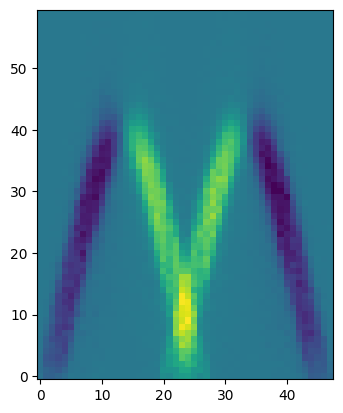

In [397]:
'''Building the pandas dataframe'''
yBinsC     = H.axes['Zrap'].centers
qtBinsC    = H.axes['Zpt'].centers
charges    = H.axes['charge'].centers
helicities = list(H.axes['helicities'])
#helicities = ['L','I','T','A','P','UL']
#multi index object
iterables = [yBinsC, qtBinsC,helicities ,charges] #2charges * 6helicities *6y bins * 8qt bins =  576 rows
multi = pd.MultiIndex.from_product(iterables , names = ['rapidity', 'qt' , 'hel','charge'])

#building dataframe
df = pd.DataFrame(a , index = multi)

#setting process as index
df.reset_index(inplace=True)
df.set_index('helXsec_'+df['hel']+'_y_'+df['rapidity'].apply(lambda x: round(x,1)).apply(str)+'_qt_'+df['qt'].apply(lambda x: round(x,1)).apply(str),inplace=True)
#df.drop(columns=['rapidity','qt','hel'],inplace=True)
plt.imshow(df.loc['helXsec_P_y_1.0_qt_1.5'].query("charge == +1.").loc[:,0:].values.reshape((48,60)).T,origin='lower');

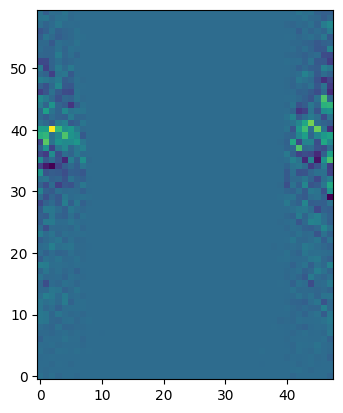

In [276]:
plt.imshow(df.query("hel=='P' & rapidity == 1.0 & qt == 1.5 & charge == 1.0").loc[:,0:].values.reshape((48,60)).T,origin='lower')

In [336]:
df.sort_values('charge', inplace=True)

In [337]:
df['xsec'] = xsec

In [338]:
df.head()

,rapidity,qt,hel,charge,0,1,2,3,4,5,...,2871,2872,2873,2874,2875,2876,2877,2878,2879,xsec
helXsec_L_y_0.2_qt_1.5,0.2,1.500000,L,-1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1979.366479
helXsec_I_y_1.0_qt_14.2,1.0,14.190872,I,-1.0,-0.040436,-0.024938,-0.023825,-0.008197,-0.004066,-0.008142,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,223.724364
helXsec_L_y_1.0_qt_14.2,1.0,14.190872,L,-1.0,-0.236667,-0.168441,-0.153126,-0.115938,-0.076658,-0.032105,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-349.398681
helXsec_UL_y_1.8_qt_18.7,1.8,18.682092,UL,-1.0,6.400378,1.793476,6.698909,7.183975,8.392379,10.952463,...,37.351146,33.556817,34.433716,27.008323,14.908151,16.010757,25.278439,7.413446,10.699551,93.216941
helXsec_UL_y_1.0_qt_11.0,1.0,10.996410,UL,-1.0,19.850897,22.942653,17.495020,4.299719,10.027815,4.394246,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1292.227105


In [181]:
yBinsC

array([0.2, 0.6, 1. , 1.4, 1.8, 2.2])

In [234]:
df.head()

,hel,rapidity,qt,charge,0,1,2,3,4,5,...,2870,2871,2872,2873,2874,2875,2876,2877,2878,2879
helXsec_UL_y_0.2_qt_1.5,UL,0.2,1.500000,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
helXsec_UL_y_0.2_qt_1.5,UL,0.2,1.500000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
helXsec_UL_y_0.2_qt_4.5,UL,0.2,4.500000,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
helXsec_UL_y_0.2_qt_4.5,UL,0.2,4.500000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
helXsec_UL_y_0.2_qt_7.8,UL,0.2,7.811576,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [190]:
df.index[:10]

Index(['helXsec_UL_y_0.2_qt_1', 'helXsec_L_y_0.2_qt_1', 'helXsec_I_y_0.2_qt_1',
       'helXsec_T_y_0.2_qt_1', 'helXsec_A_y_0.2_qt_1', 'helXsec_P_y_0.2_qt_1',
       'helXsec_UL_y_0.2_qt_1', 'helXsec_L_y_0.2_qt_1', 'helXsec_I_y_0.2_qt_1',
       'helXsec_T_y_0.2_qt_1'],
      dtype='object')

In [209]:
df['rapidity'].apply(lambda x: round(x,1)).apply(str).unique()

array(['0.2', '0.6', '1.0', '1.4', '1.8', '2.2'], dtype=object)

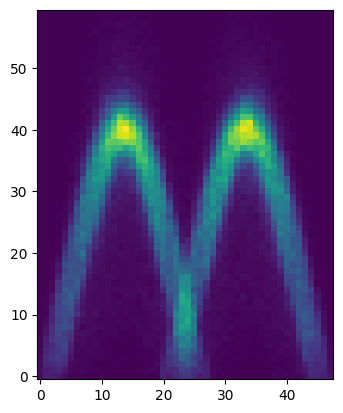

In [227]:
plt.imshow(df.loc['helXsec_P_y_1.0_qt_1.5'].query("charge == +1.").loc[:,0:].values.reshape((48,60)).T,origin='lower');

In [418]:
'''loading the file and extracting as numpy array'''
f = h5py.File("templatesTest2.hdf5","r")
results = narf.ioutils.pickle_load_h5py(f["results"])
H = results['ZmumuPostVFP']['output']['signalTemplates_nominal'].get() #boost histogram values
#H2 = resultsresults['ZmumuPostVFP']['output']['signalTemplates_mass'].get()
t = h5py.File('templatesFit.hdf5','r')


'''Unpacking the data'''
#first unroll the tensor in eta and pt shape: (6,8,48,60,2,6) -> (6,8,2880,2,6)
unrolled = H.to_numpy()[0].reshape((6,8,-1,2,6)) 
#next, swap axes such that unrolled eta/pt in in last position (6,8,2880,2,6) -> (6,8,2,6,2880)
#lastly, reshape into 2 dimensional array which will be passed into dataframe (6,8,2,6,2880) -> (576,2880)
#one row corresponds to one unrolled pt/eta distribution (template)
a = np.swapaxes(unrolled , 2 , -1).reshape(-1,2880) 

'''Building the pandas dataframe'''
yBinsC     = H.axes['Zrap'].centers
qtBinsC    = H.axes['Zpt'].centers
charges    = H.axes['charge'].centers
helicities = list(H.axes['helicities'])
#helicities = ['L','I','T','A','P','UL']
#multi index object
iterables = [yBinsC, qtBinsC,helicities ,charges] #2charges * 6helicities *6y bins * 8qt bins =  576 rows
multi = pd.MultiIndex.from_product(iterables , names = ['rapidity', 'qt' , 'hel','charge'])

#building dataframe
df = pd.DataFrame(a , index = multi)


'''Adding cross section information to our dataframe by merging'''
qtBins = np.array([0., 3., 6., 9.62315204,12.36966732,16.01207711,21.35210602,29.50001253,60.,200.]) #these have to be like this for now
yBins = np.array([0., 0.4, 0.8, 1.2, 1.6, 2.0, 2.4, 3.0, 10.0])

threshold_y = np.digitize(2.4,yBins)-1
threshold_qt = np.digitize(60.,qtBins)-1

T = t['helicity'][:threshold_y,:threshold_qt,:] #cross sections
processes = [yBinsC , qtBinsC , helicities]
multi2 = pd.MultiIndex.from_product(processes , names = ['rapidity', 'qt' , 'hel'])
charges =  [-1.0]*288 + [1.0]*288
s = pd.Series(T.ravel(), index = multi2 , name='xsec')
xsec_df = pd.concat([s,s] ,axis=0).reset_index()
xsec_df['charge'] = charges



df = df.merge(xsec_df ,left_on=['rapidity','qt','hel','charge'], right_on=['rapidity','qt','hel','charge'])



#setting process as index
df.set_index('helXsec_'+df['hel']+'_y_'+df['rapidity'].apply(lambda x: round(x,1)).apply(str)+'_qt_'+df['qt'].apply(lambda x: round(x,1)).apply(str),inplace=True)
df.drop(columns=['rapidity','qt','hel'],inplace=True)

In [419]:
df.head()

,charge,0,1,2,3,4,5,6,7,8,...,2871,2872,2873,2874,2875,2876,2877,2878,2879,xsec
helXsec_L_y_0.2_qt_1.5,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1979.366479
helXsec_L_y_0.2_qt_1.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1979.366479
helXsec_I_y_0.2_qt_1.5,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,223.724364
helXsec_I_y_0.2_qt_1.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,223.724364
helXsec_T_y_0.2_qt_1.5,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-349.398681
